Importing Libraries

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import warnings 
from six.moves import urllib
warnings.filterwarnings("ignore")

%matplotlib inline

Importing the dataset

In [8]:
data_student = pd.read_csv('https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv')

In [10]:
data_student.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [12]:
data_student['University Rating'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

In [13]:
data_student['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

Checking the Feature Names

In [14]:
data_student.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

<AxesSubplot:>

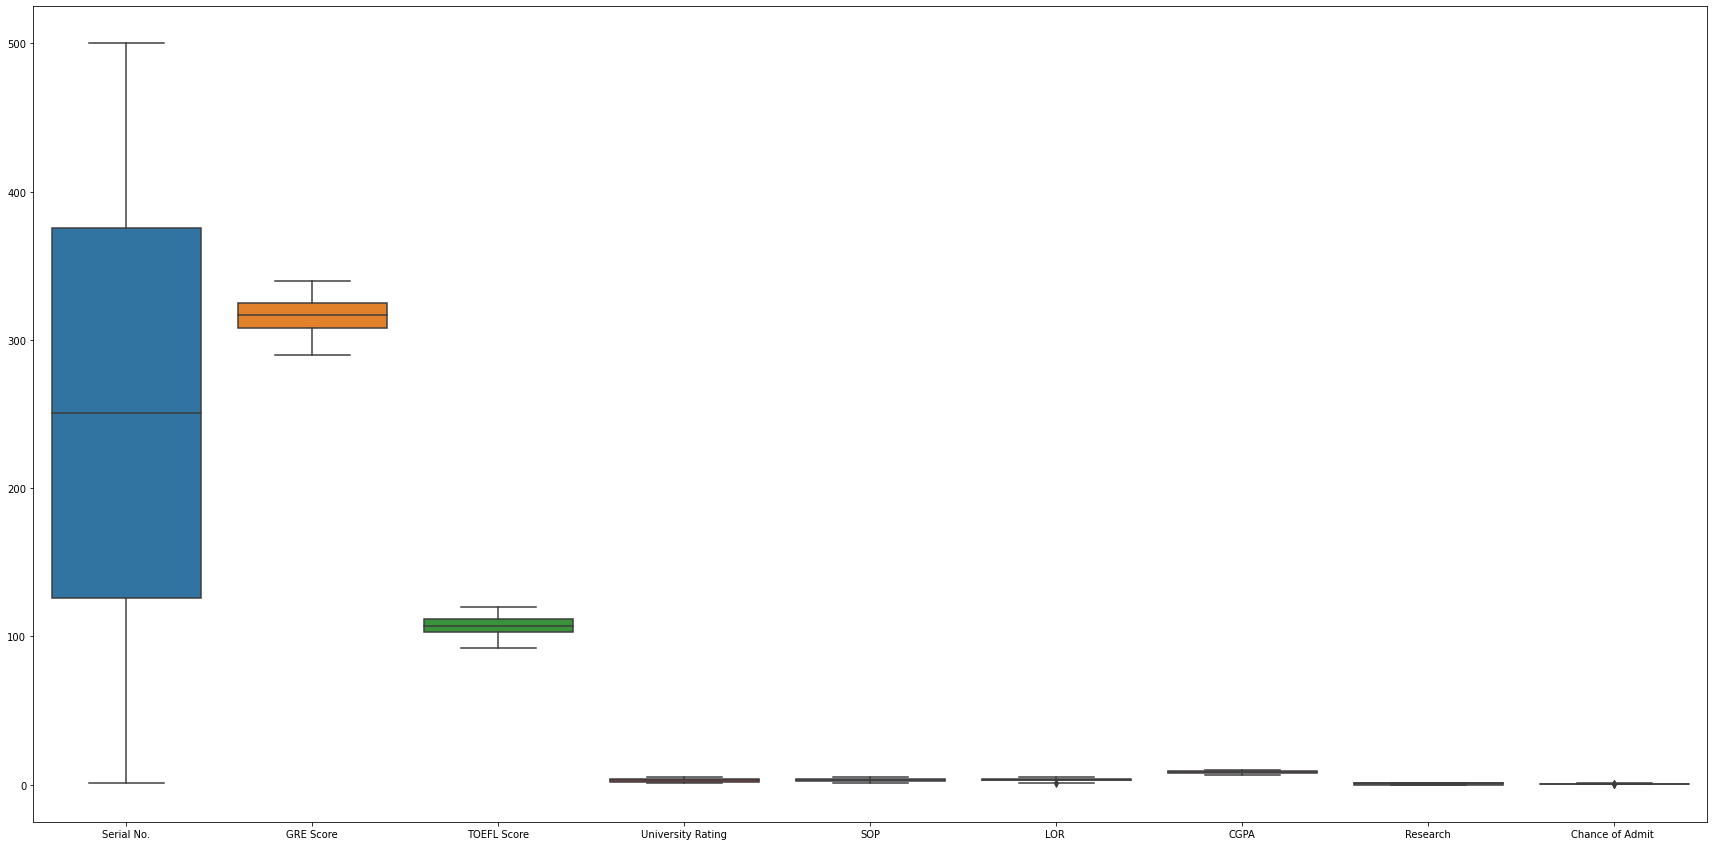

In [17]:
plt.subplots(figsize=(30,15)) 
sns.boxplot(data=data_student)

No outliers present in the data set

In [19]:
data_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


Checking Missing values

In [20]:
data_student.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Checking datatype of features

In [24]:
data_student.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

Checking Data size

In [25]:
data_student.shape

(500, 9)

In [26]:
data_student.memory_usage()

Index                 128
Serial No.           4000
GRE Score            4000
TOEFL Score          4000
University Rating    4000
SOP                  4000
LOR                  4000
CGPA                 4000
Research             4000
Chance of Admit      4000
dtype: int64

Checking Statistical Values for features

In [29]:
data_student.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


Checking Correlation between features

In [30]:
data_student.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:>

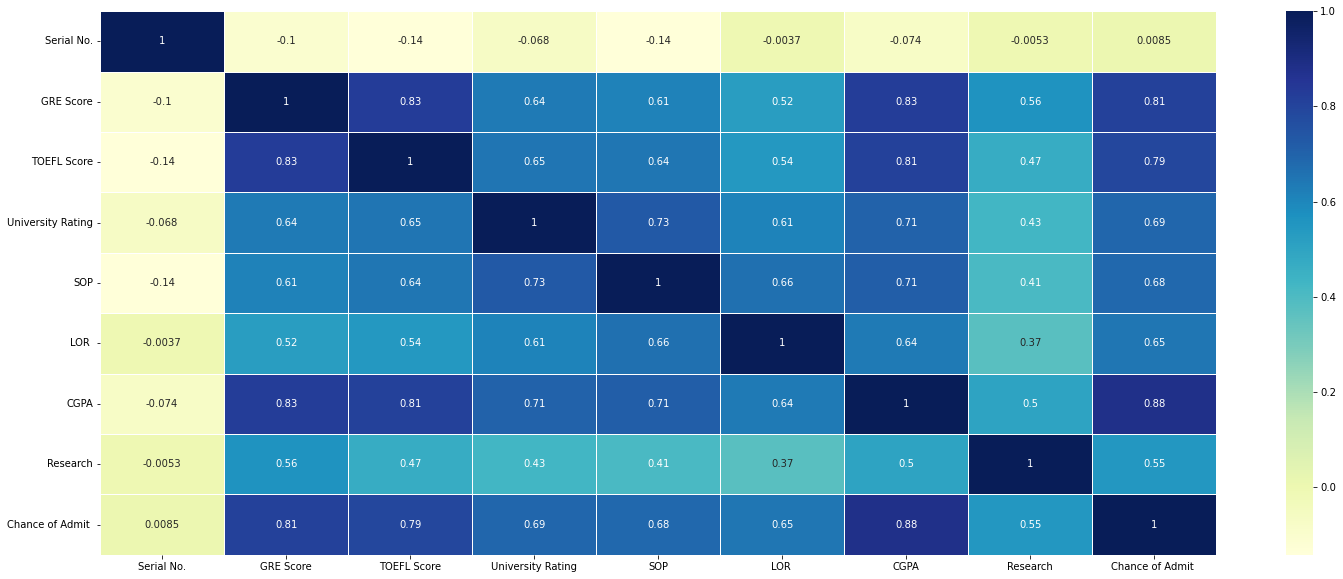

In [35]:
plt.figure(figsize=(25,10))
sns.heatmap(data_student.corr(),annot=True,cmap='YlGnBu',linewidths=0.5)

Distribution of features

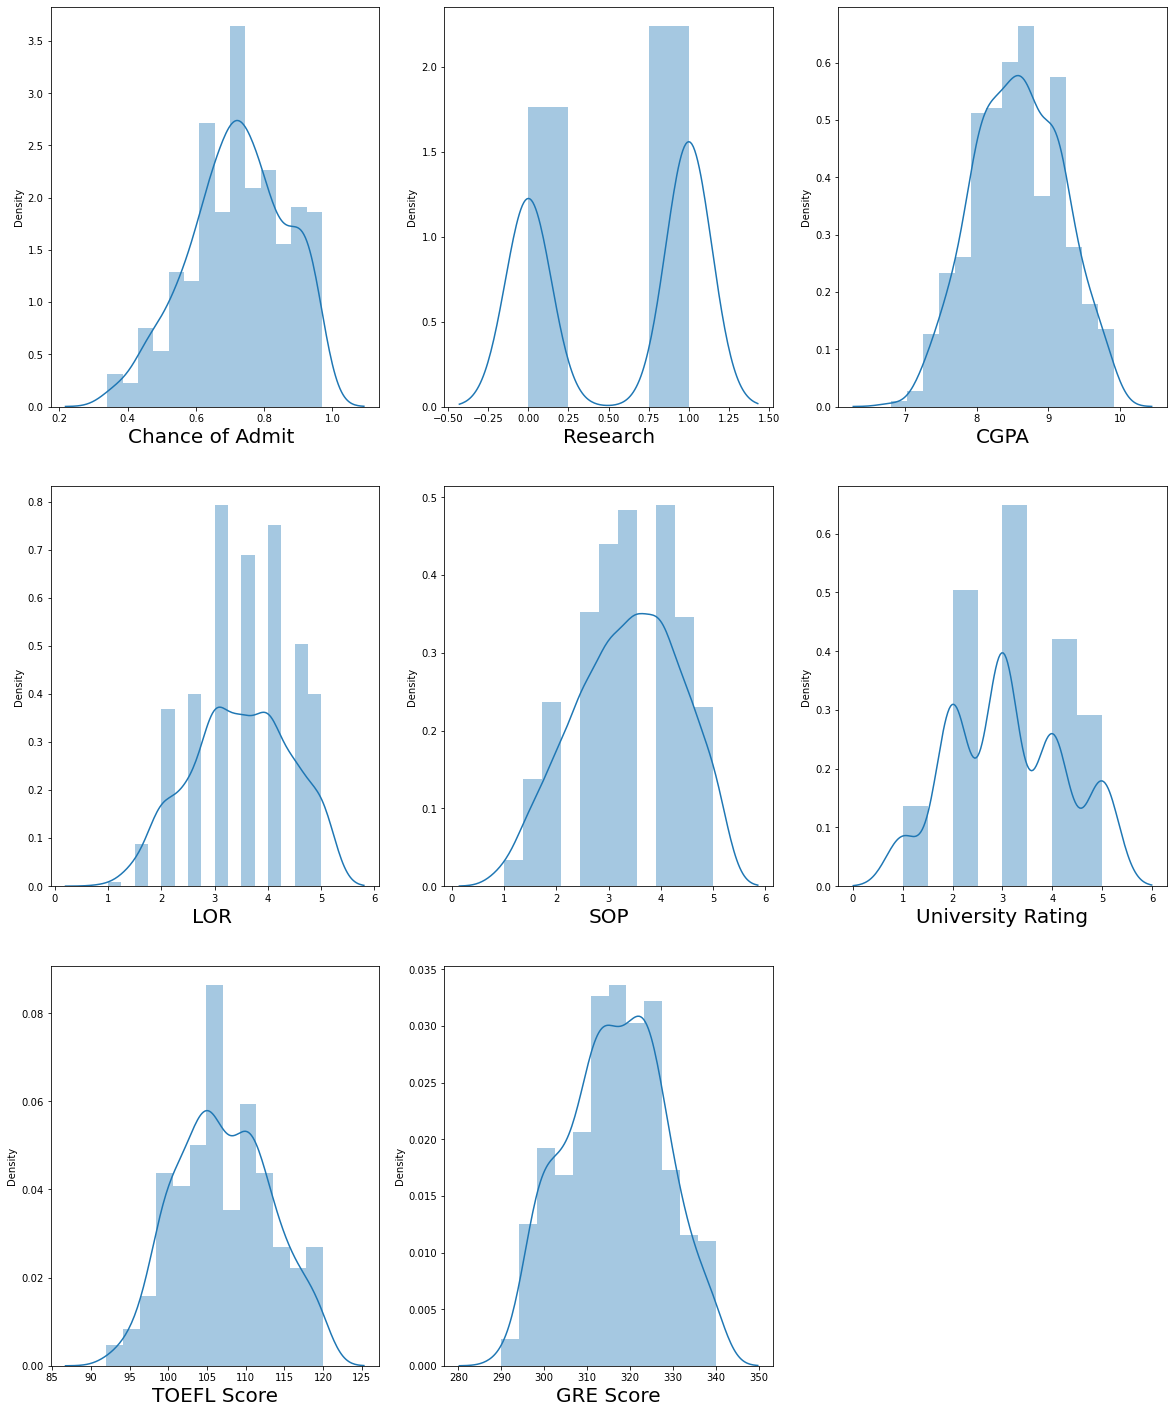

In [73]:
plt.figure(figsize=(20,25), facecolor='white') 
plotnumber = 9

for column in data_student:
    if plotnumber<9 and plotnumber >0:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_student[column])
        plt.xlabel(column,fontsize=20)
    plotnumber-=1
plt.show()

Segregating Dependent & Independent Feature

In [78]:
X=data_student.drop('Chance of Admit ',axis=1) #Dropping dependent feature Chance of Admit 


In [77]:
X.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


In [80]:
y=data_student["Chance of Admit "] # Retaining Dependent Feature at Y


In [81]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

# SVR - Model raining


In [82]:
#Splitting Dataset into Training and Test data
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=5)

In [83]:
X_train

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
111,112,321,109,4,4.0,4.0,8.68,1
262,263,308,103,2,2.5,4.0,8.36,1
317,318,300,99,1,1.0,2.5,8.01,0
352,353,303,100,2,3.0,3.5,8.06,1
470,471,320,110,5,4.0,4.0,9.27,1
...,...,...,...,...,...,...,...,...
486,487,319,102,3,2.5,2.5,8.37,0
189,190,324,112,5,5.0,5.0,9.08,1
495,496,332,108,5,4.5,4.0,9.02,1
206,207,315,99,2,3.5,3.0,7.89,0


In [85]:
y_train

111    0.69
262    0.70
317    0.58
352    0.64
470    0.87
       ... 
486    0.68
189    0.88
495    0.87
206    0.63
355    0.73
Name: Chance of Admit , Length: 375, dtype: float64

In [86]:
y_test

241    0.65
448    0.80
75     0.72
212    0.95
481    0.78
       ... 
230    0.73
435    0.55
132    0.71
49     0.78
224    0.67
Name: Chance of Admit , Length: 125, dtype: float64

In [87]:
#scaling Features
from sklearn.preprocessing import StandardScaler
svr= StandardScaler()
X_train = svr.fit_transform(X_train) 
X_test = svr.transform(X_test)


In [88]:
from sklearn.svm import SVR 
classifier=SVR(kernel="rbf") 
classifier.fit(X_train,y_train)


SVR()

In [89]:
# Predicting the Test set results 
y_pred_svr = classifier.predict(X_test)


In [90]:
y_pred_svr


array([0.6031436 , 0.75020984, 0.65388388, 0.88262554, 0.70719213,
       0.72040092, 0.60853199, 0.73957338, 0.65555839, 0.73512649,
       0.50057531, 0.4651421 , 0.83825837, 0.77673383, 0.7299554 ,
       0.57768214, 0.62591566, 0.88246557, 0.78218895, 0.83987517,
       0.81018748, 0.58290016, 0.72286646, 0.80274409, 0.8556272 ,
       0.69574266, 0.64883027, 0.7260078 , 0.63880273, 0.52173514,
       0.60602905, 0.71412122, 0.83968408, 0.72898075, 0.80429097,
       0.81941789, 0.51606937, 0.76710295, 0.58580961, 0.83878118,
       0.71544013, 0.62741834, 0.81397482, 0.84301067, 0.65486328,
       0.83915214, 0.83265519, 0.66533455, 0.66957572, 0.56347245,
       0.7702024 , 0.77898269, 0.7124454 , 0.52562937, 0.49171143,
       0.86329516, 0.67445531, 0.75720462, 0.50586996, 0.69690054,
       0.72520804, 0.61948237, 0.67212584, 0.6096868 , 0.60987582,
       0.66257612, 0.5562933 , 0.78549676, 0.69411896, 0.68984629,
       0.83688045, 0.48570134, 0.58797895, 0.71702481, 0.62915

In [91]:
classifier.score(X_test,y_test)

0.6711539257780758